In [ ]:
# !unzip -qq "/content/drive/MyDrive/데이콘/WebLog Analytic/open.zip" -d "/content/drive/MyDrive/데이콘/WebLog Analytic"

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("rocket")

In [ ]:
# 데이터 로드

train = pd.read_csv("/content/drive/MyDrive/Commit/ML_project/WebLog/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Commit/ML_project/WebLog/data/test.csv")

train.shape, test.shape

((252289, 19), (79786, 18))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79786 entries, 0 to 79785
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sessionID            79786 non-null  object 
 1   userID               79786 non-null  object 
 2   browser              79786 non-null  object 
 3   OS                   79786 non-null  object 
 4   device               79786 non-null  object 
 5   new                  79786 non-null  int64  
 6   quality              79786 non-null  float64
 7   duration             79786 non-null  float64
 8   bounced              79786 non-null  int64  
 9   transaction          79786 non-null  float64
 10  transaction_revenue  79786 non-null  float64
 11  continent            79786 non-null  object 
 12  subcontinent         79786 non-null  object 
 13  country              79786 non-null  object 
 14  traffic_source       79786 non-null  object 
 15  traffic_medium       79786 non-null 

# Column 설명
sessionID : 세션 ID

userID : 사용자 ID

TARGET : 세션에서 발생한 총 조회수

browser : 사용된 브라우저

OS : 사용된 기기의 운영체제

device : 사용된 기기

new : 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)

quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)

duration : 총 세션 시간 (단위: 초)

bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)

transaction : 세션 내에서 발생의 거래의 수

transaction_revenue : 총 거래 수익

continent : 세션이 발생한 대륙

subcontinent : 세션이 발생한 하위 대륙

country : 세션이 발생한 국가

traffic_source : 트래픽이 발생한 소스

traffic_medium : 트래픽 소스의 매체

keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정

referral_path : traffic_medium이 referral인 경우 설정되는 경로

In [ ]:
train.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


In [ ]:
test.head()

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,SESSION_252293,USER_206028,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088


In [ ]:
train.drop(["userID", "sessionID"], axis = 1,inplace = True)

test_ID = test["sessionID"]
test.drop(["userID", "sessionID"], axis = 1,inplace = True)

train.shape, test.shape

((252289, 17), (79786, 16))

### Column Check

In [ ]:
# TARGET Column Check

train["TARGET"].describe()

count    252289.000000
mean          3.592626
std           5.509465
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         386.000000
Name: TARGET, dtype: float64

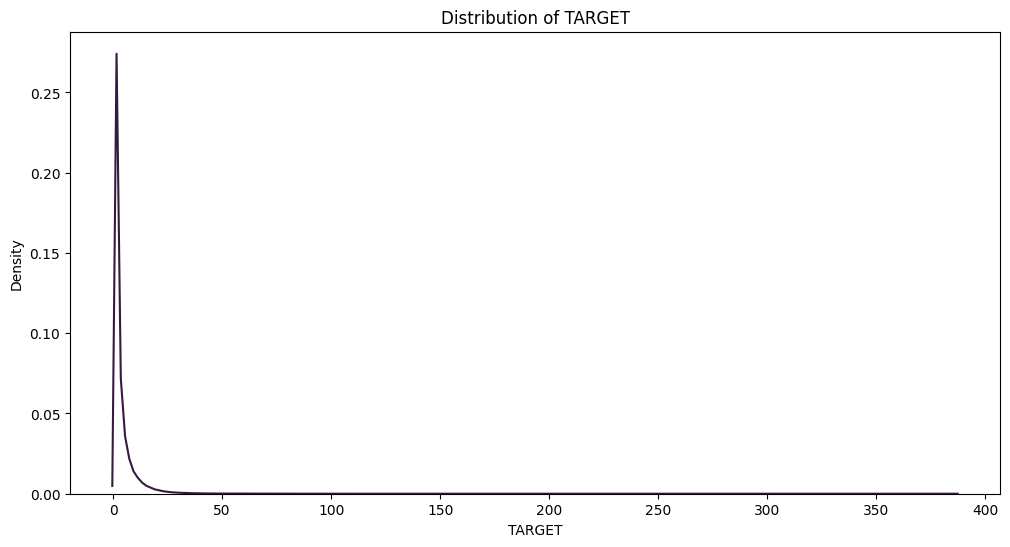

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(x="TARGET", data = train)
plt.title("Distribution of TARGET")
plt.show()

In [ ]:
train["TARGET"].value_counts()

1.0      126008
2.0       33690
3.0       23636
4.0       14291
5.0       10743
          ...  
125.0         1
171.0         1
270.0         1
81.0          1
199.0         1
Name: TARGET, Length: 117, dtype: int64

In [ ]:
train.columns

Index(['TARGET', 'browser', 'OS', 'device', 'new', 'quality', 'duration',
       'bounced', 'transaction', 'transaction_revenue', 'continent',
       'subcontinent', 'country', 'traffic_source', 'traffic_medium',
       'keyword', 'referral_path'],
      dtype='object')

In [ ]:
# check the type of Columns(Numeric Vs. categoric)
cat_columns = []
num_columns = []

for column in train.columns:
    if train[column].dtype == "object":
        cat_columns.append(column)
    else:
        num_columns.append(column)

print(f"The Number of Categorical Column: {len(cat_columns)}")
print(f"Categorical Columns: {cat_columns}")
print(f"The Number of Numeric Column: {len(num_columns)}")
print(f"Numeric Columns: {num_columns}")

The Number of Categorical Column: 10
Categorical Columns: ['browser', 'OS', 'device', 'continent', 'subcontinent', 'country', 'traffic_source', 'traffic_medium', 'keyword', 'referral_path']
The Number of Numeric Column: 7
Numeric Columns: ['TARGET', 'new', 'quality', 'duration', 'bounced', 'transaction', 'transaction_revenue']


In [ ]:
# check the categorical Column(browser)
print(train["browser"].unique())

['Chrome' 'Samsung Internet' 'Firefox' 'Opera' 'Safari (in-app)' 'Edge'
 'Safari' 'Android Webview' 'UC Browser' 'Internet Explorer' 'Opera Mini'
 'BlackBerry' 'Android Browser' 'Amazon Silk' 'Coc Coc' 'YaBrowser'
 'Nintendo Browser' 'Nokia Browser' 'MRCHROME' 'Puffin'
 'Mozilla Compatible Agent' 'Maxthon' '+Simple Browser' 'Apple-iPhone7C2'
 'Playstation Vita Browser' 'osee2unifiedRelease' 'SAMSUNG-SM-B355E Opera'
 'DESKTOP' 'Iron' 'Browser' 'rpfanjzoxyemsgbtichqkudwlv'
 'cajrnbtvqwfkolzyxushpdgime' 'wvsmagudcqeytijorlhxnfzkbp'
 'efkaxnbyohqtspzlvcwrjmigdu' 'bsfnwveckhgpdoyjxmizruqtla' 'Mozilla'
 'Konqueror' 'Netscape' 'Amazon.com' 'SeaMonkey'
 ';__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;'
 'eosutpkiahjzvdgcwxlmyfqbrn' 'cnwmpegudakrqzljtvfxohbysi'
 'fspmihbxzowgnuctrqykjlvade' 'YE'
 ';__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183;'
 'dkagwlhmfqxercuozpnbvtsiyj' 'kqebrzuwmiycxdvtoljnhsfpga'
 'ohukwejvqmdtibfrzpycgxanls' 'Seznam'
 ';__CT_JOB_ID__:fe02e46f-b6ae-41f1-8563-3b

In [ ]:
# Top 10 Browser Counts and Ratio
data = train['browser'].value_counts(normalize = True)[:15].to_frame("Ratio").join(
    train['browser'].value_counts(normalize = False)[:15].to_frame("Counts")
)
data

,Ratio,Counts
Chrome,0.691251,174395
Safari,0.141461,35689
Android Webview,0.054917,13855
Firefox,0.033438,8436
Internet Explorer,0.018126,4573
Edge,0.014674,3702
Samsung Internet,0.012196,3077
Opera Mini,0.012054,3041
Safari (in-app),0.007908,1995
Opera,0.005276,1331


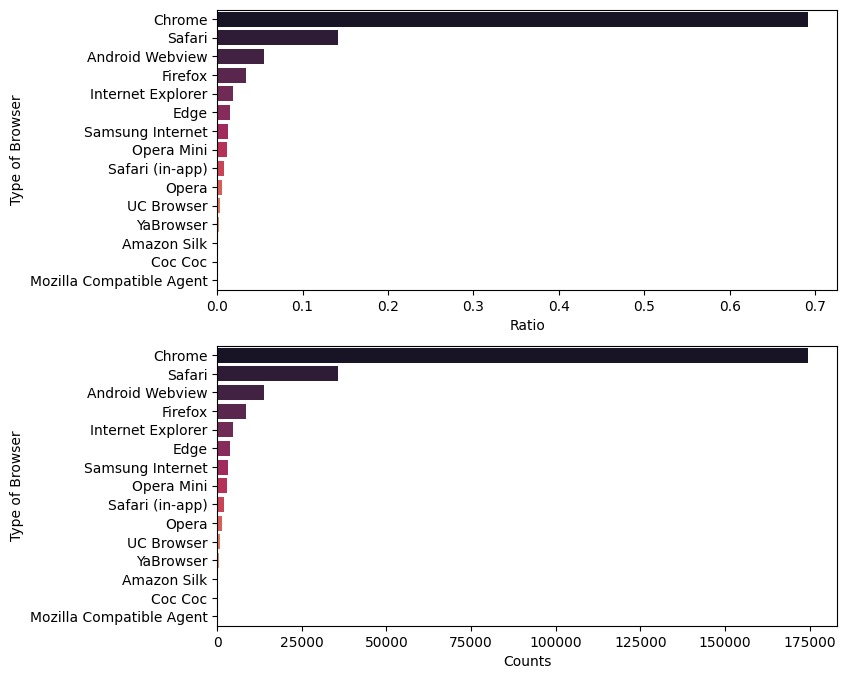

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (8, 8))
sns.barplot(data = data, x = 'Ratio', y = data.index, hue = data.index, legend = False, palette = "rocket", ax = ax[0])
ax[0].set_xlabel("Ratio")
ax[0].set_ylabel("Type of Browser")

sns.barplot(data = data, x = 'Counts', y = data.index, hue = data.index, legend = False, palette = "rocket", ax = ax[1])
ax[1].set_xlabel("Counts")
ax[1].set_ylabel("Type of Browser")
plt.show()

In [ ]:
# Check similar browsers
for value in train["browser"].unique():
    if 'Android' in value:
        print(value)

for value in train["browser"].unique():
    if 'Safari' in value:
        print(value)

for value in train["browser"].unique():
    if 'Opera' in value:
        print(value)

Android Webview
Android Browser
Safari (in-app)
Safari
Opera
Opera Mini
SAMSUNG-SM-B355E Opera


In [ ]:
# Check similar browsers
for value in test["browser"].unique():
    if 'Android' in value:
        print(value)

for value in test["browser"].unique():
    if 'Safari' in value:
        print(value)

for value in test["browser"].unique():
    if 'Opera' in value:
        print(value)

Android Webview
Android Browser
Safari
Safari (in-app)
Opera Mini
Opera


In [ ]:
browsers = ["Android", "Safari", "Opera"]
for browser in browsers:
    for value in train["browser"].unique():
        if browser in value:
            train["browser"] = train["browser"].replace(value, browser)

for browser in browsers:
    for value in test["browser"].unique():
        if browser in value:
            test["browser"] = test["browser"].replace(value, browser)

In [ ]:
data = train['browser'].value_counts(normalize = True)[:15].to_frame("Ratio").join(
    train['browser'].value_counts(normalize = False)[:15].to_frame("Counts")
)
data

,Ratio,Counts
Chrome,0.691251,174395
Safari,0.149368,37684
Android,0.055353,13965
Firefox,0.033438,8436
Internet Explorer,0.018126,4573
Opera,0.017337,4374
Edge,0.014674,3702
Samsung Internet,0.012196,3077
UC Browser,0.003571,901
YaBrowser,0.001593,402


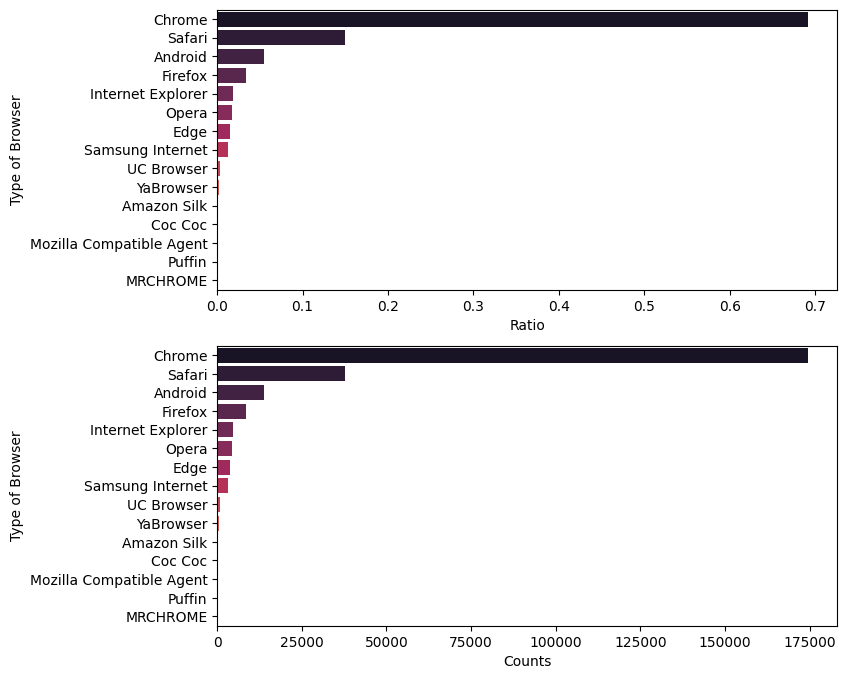

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (8, 8))
sns.barplot(data = data, x = 'Ratio', y = data.index, hue = data.index, legend = False, palette = "rocket", ax = ax[0])
ax[0].set_xlabel("Ratio")
ax[0].set_ylabel("Type of Browser")

sns.barplot(data = data, x = 'Counts', y = data.index, hue = data.index, legend = False, palette = "rocket", ax = ax[1])
ax[1].set_xlabel("Counts")
ax[1].set_ylabel("Type of Browser")
plt.show()

In [ ]:
# 주요 브라우저와 others 비율, Count 확인
main = ["Chrome"]
others_train = [x for x in train["browser"].unique() if x not in main]
others_test = [x for x in test["browser"].unique() if x not in main]

check_db = train.copy()
check_db["category"] = check_db["browser"].apply(lambda x: "main" if x in main else "others")

In [ ]:
print((check_db["category"] == "main").sum())
print((check_db["category"] == "others").sum())

174395
77894


In [ ]:
# Browser 정리
train["browser"] = train["browser"].apply(lambda x: "Other" if x in others_train else x)
print(train["browser"].unique())

test["browser"] = test["browser"].apply(lambda x: "Other" if x in others_test else x)
print(test["browser"].unique())

['Chrome' 'Other']
['Chrome' 'Other']


In [ ]:
data = train['browser'].value_counts(normalize = True).to_frame("Ratio").join(
    train['browser'].value_counts(normalize = False).to_frame("Counts")
)
data

,Ratio,Counts
Chrome,0.691251,174395
Other,0.308749,77894


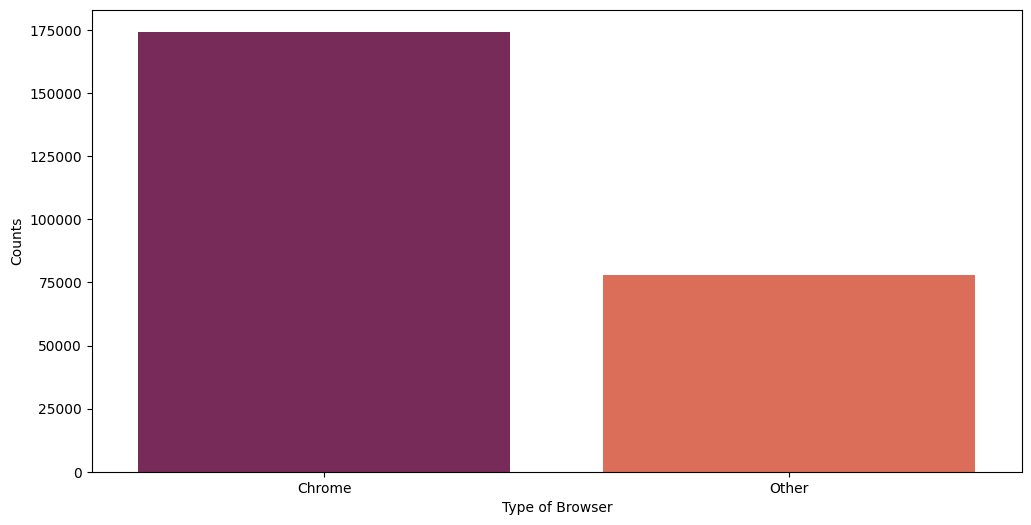

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = data.index, y = 'Counts', hue = data.index, legend = False, palette = "rocket")
plt.xlabel("Type of Browser")
plt.ylabel("Counts")
plt.show()

In [ ]:
# Check OS
train["OS"].unique()

array(['Macintosh', 'Windows', 'Android', 'iOS', 'Linux', 'Tizen',
       'Chrome OS', 'BlackBerry', '(not set)', 'Xbox', 'Samsung',
       'Windows Phone', 'OS/2', 'Nintendo 3DS', 'Playstation Vita',
       'FreeBSD', 'SunOS', 'Nintendo WiiU', 'Firefox OS', 'SymbianOS',
       'Nokia'], dtype=object)

In [ ]:
data = train['OS'].value_counts(normalize = True)[:15].to_frame("Ratio").join(
    train['OS'].value_counts(normalize = False)[:15].to_frame("Counts")
)
data

,Ratio,Counts
Windows,0.349278,88119
Macintosh,0.239075,60316
Android,0.205598,51870
iOS,0.118031,29778
Linux,0.037901,9562
Chrome OS,0.036553,9222
(not set),0.010274,2592
Tizen,0.001272,321
Samsung,0.001027,259
Windows Phone,0.000507,128


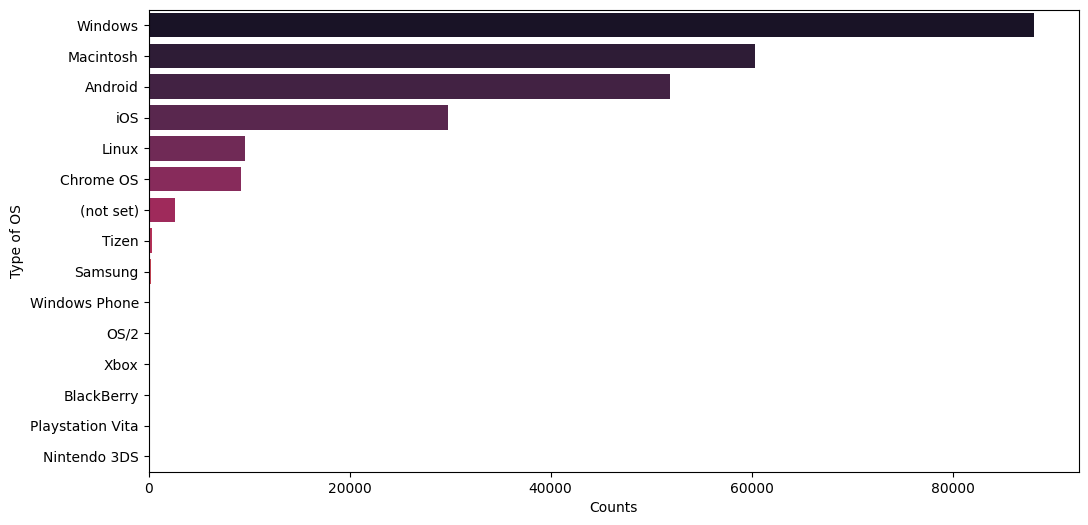

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = 'Counts', y = data.index, hue = data.index, legend = False, palette = "rocket")
plt.xlabel("Counts")
plt.ylabel("Type of OS")
plt.show()

In [ ]:
# OS check
main = ["Windows", "Macintosh", "Android", "iOS"]
others_train = [x for x in train["OS"].unique() if x not in main]
others_test = [x for x in test["OS"].unique() if x not in main]

In [ ]:
# Browser 정리
train["OS"] = train["OS"].apply(lambda x: "Other" if x in others_train else x)
print(train["OS"].unique())

test["OS"] = test["OS"].apply(lambda x: "Other" if x in others_test else x)
print(test["OS"].unique())

['Macintosh' 'Windows' 'Android' 'iOS' 'Other']
['Other' 'iOS' 'Windows' 'Android' 'Macintosh']


In [ ]:
data = train['OS'].value_counts(normalize = True).to_frame("Ratio").join(
    train['OS'].value_counts(normalize = False).to_frame("Counts")
)
data

,Ratio,Counts
Windows,0.349278,88119
Macintosh,0.239075,60316
Android,0.205598,51870
iOS,0.118031,29778
Other,0.088018,22206


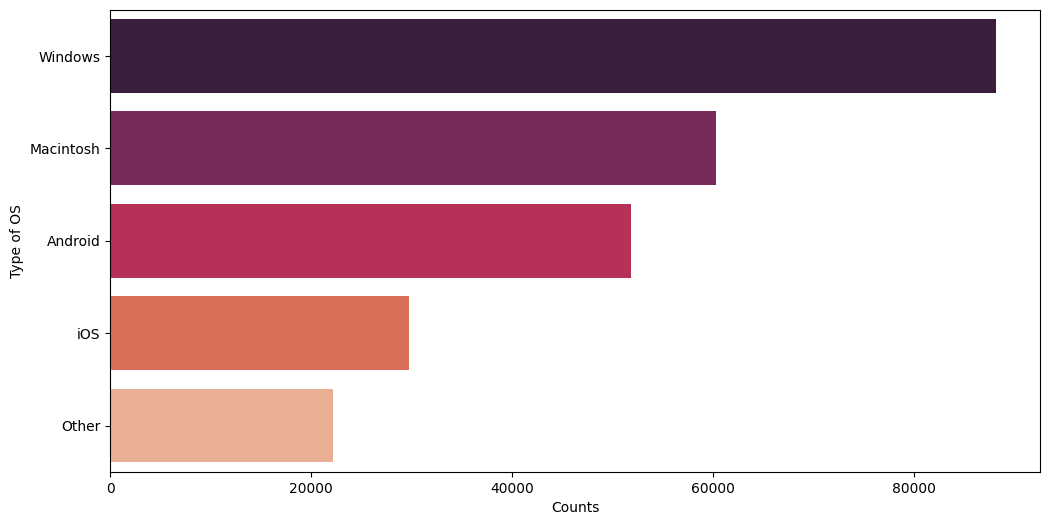

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = 'Counts', y = data.index, hue = data.index, legend = False, palette = "rocket")
plt.xlabel("Counts")
plt.ylabel("Type of OS")
plt.show()

In [ ]:
# device check
train["device"].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

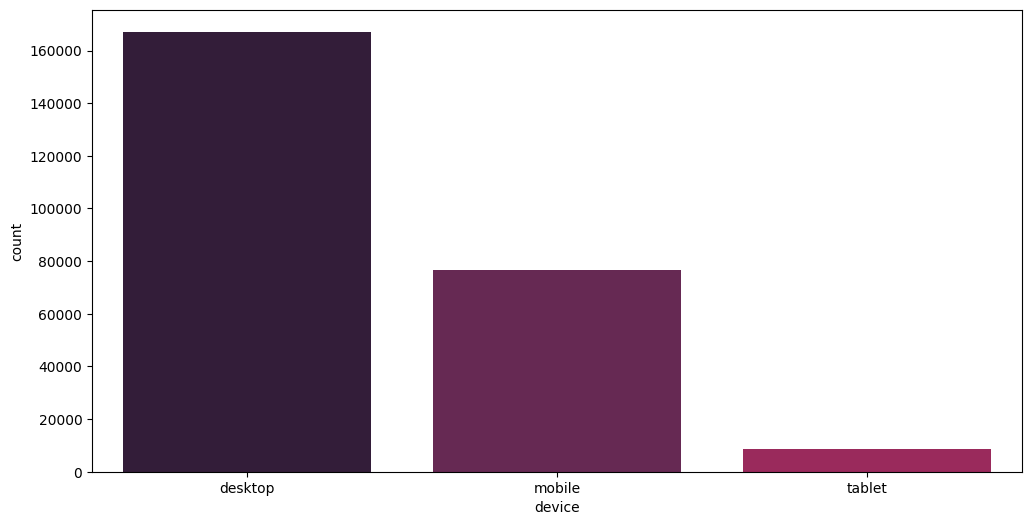

In [ ]:
# device 비율 확인

plt.figure(figsize = (12, 6))
sns.countplot(x = train["device"], hue = train["device"], legend = False)
plt.show()

In [ ]:
# mobile과 tablet 합치기
train["device"] = train["device"].str.replace('tablet', 'mobile')
print(train["device"].unique())
test["device"] = test["device"].str.replace('tablet', 'mobile')
print(test["device"].unique())

['desktop' 'mobile']
['desktop' 'mobile']


In [ ]:
cat_columns

['browser',
 'OS',
 'device',
 'continent',
 'subcontinent',
 'country',
 'traffic_source',
 'traffic_medium',
 'keyword',
 'referral_path']

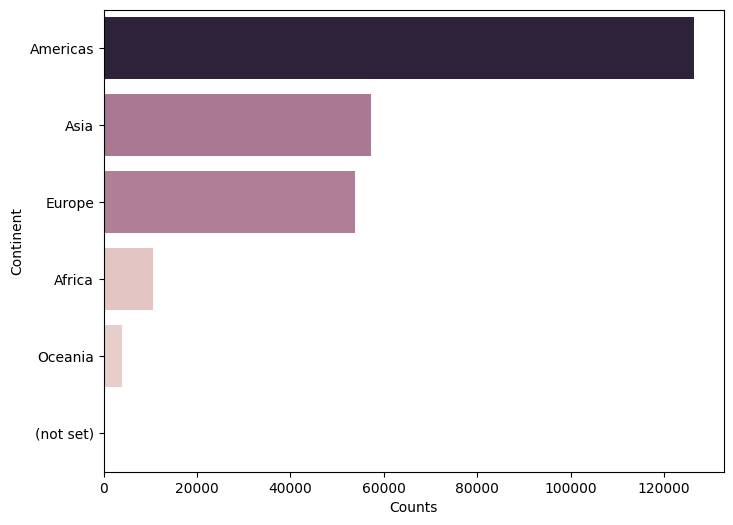

In [ ]:
# Check Continent Column
data = train["continent"].value_counts().to_frame()

plt.figure(figsize = (8, 6))
sns.barplot(data = data, x = "continent", y = data.index, hue = "continent", legend = False)
plt.xlabel("Counts")
plt.ylabel("Continent")
plt.show()

In [ ]:
train.loc[train["continent"] == "(not set)"]

,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
978,1.0,Other,iOS,mobile,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),google,cpc,Category9,NaN
1065,1.0,Chrome,Android,mobile,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),(direct),(none),NaN,NaN
2012,4.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,(not set),(not set),(not set),(direct),(none),NaN,NaN
2781,1.0,Chrome,Android,mobile,0,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),(direct),(none),NaN,NaN
3077,2.0,Chrome,Android,mobile,0,1.0,8.0,0,0.0,0.0,(not set),(not set),(not set),(direct),(none),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250035,1.0,Chrome,Windows,desktop,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),google,organic,Category8,NaN
250612,1.0,Chrome,Windows,desktop,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),analytics.google.com,referral,NaN,Category3_Path_0013
250654,3.0,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,(not set),(not set),(not set),google,organic,Category8,NaN
251144,1.0,Other,Windows,desktop,1,1.0,0.0,1,0.0,0.0,(not set),(not set),(not set),youtube.com,referral,NaN,Category13_Path_0029


In [ ]:
print(train["continent"].mode()[0])
print(train["subcontinent"].mode()[0])
print(train["country"].mode()[0])
print("-" * 20)
print(test["continent"].mode()[0])
print(test["subcontinent"].mode()[0])
print(test["country"].mode()[0])

Americas
Northern America
United States
--------------------
Americas
Northern America
United States


In [ ]:
# (not set) value 대체
train["continent"] = train["continent"].replace("(not set)", train["continent"].mode()[0])
train["continent"].unique()

test["continent"] = test["continent"].replace("(not set)", test["continent"].mode()[0])
test["continent"].unique()

array(['Americas', 'Asia', 'Europe', 'Africa', 'Oceania'], dtype=object)

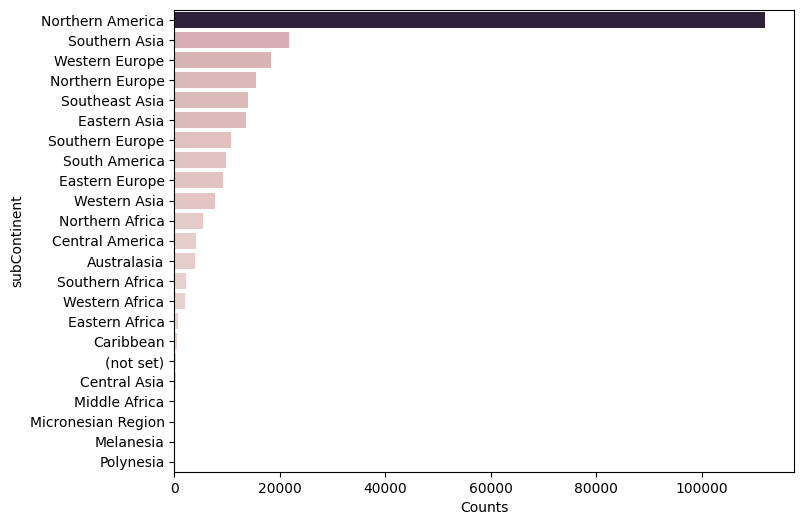

In [ ]:
# Check SubContinent Column
data = train["subcontinent"].value_counts().to_frame()

plt.figure(figsize = (8, 6))
sns.barplot(data = data, x = "subcontinent", y = data.index, hue = "subcontinent", legend = False)
plt.xlabel("Counts")
plt.ylabel("subContinent")
plt.show()

In [ ]:
train["subcontinent"] = train["subcontinent"].replace("(not set)", train["subcontinent"].mode()[0])
train["subcontinent"].unique()

test["subcontinent"] = test["subcontinent"].replace("(not set)", test["subcontinent"].mode()[0])
test["subcontinent"].unique()

array(['Northern America', 'Southern Asia', 'Southern Europe',
       'Southeast Asia', 'South America', 'Northern Europe',
       'Central America', 'Northern Africa', 'Western Europe',
       'Eastern Asia', 'Australasia', 'Eastern Europe', 'Western Africa',
       'Western Asia', 'Central Asia', 'Caribbean', 'Southern Africa',
       'Eastern Africa', 'Middle Africa', 'Melanesia',
       'Micronesian Region', 'Polynesia'], dtype=object)

In [ ]:
train["country"].unique()

array(['United States', 'Germany', 'Malaysia', 'Greece', 'Brazil',
       'Italy', 'Mexico', 'Laos', 'United Kingdom', 'Philippines',
       'Bulgaria', 'Russia', 'Poland', 'China', 'Romania', 'Belgium',
       'India', 'United Arab Emirates', 'Portugal', 'Canada', 'Algeria',
       'Egypt', 'Pakistan', 'Japan', 'Australia', 'South Africa',
       'Turkey', 'Austria', 'New Zealand', 'Singapore', 'Taiwan',
       'France', 'Saudi Arabia', 'Colombia', 'Ecuador', 'Thailand',
       'Vietnam', 'Sweden', 'Sri Lanka', 'South Korea', 'Kuwait', 'Kenya',
       'Bolivia', 'Spain', 'Hong Kong', 'Bangladesh', 'Serbia',
       'Netherlands', 'El Salvador', 'Czechia', 'Peru', 'Ukraine',
       'Réunion', 'Israel', 'Nepal', 'Ireland', 'Indonesia', 'Argentina',
       'Finland', 'Hungary', 'Switzerland', 'Qatar', 'Georgia', 'Nigeria',
       'Oman', 'Benin', 'Belarus', 'Côte d’Ivoire', 'Dominican Republic',
       'Denmark', 'Morocco', 'Macau', 'Slovakia', 'Guatemala', 'Norway',
       'Armenia', 'Su

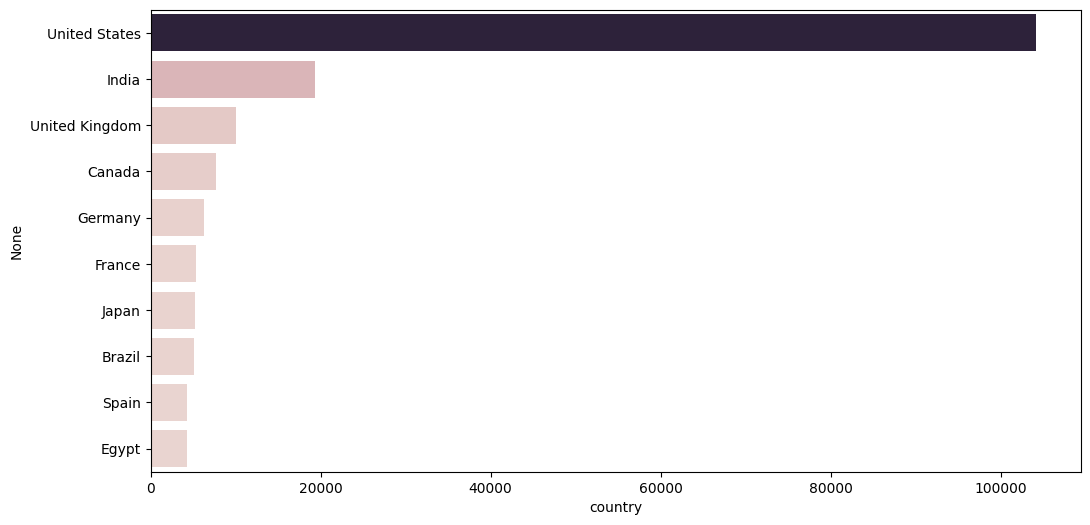

In [ ]:
data = train["country"].value_counts()[:10].to_frame()

plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = "country", y = data.index, hue = "country", legend = False)
plt.show()

In [ ]:
check_db = train.copy()
check_db.drop(["subcontinent", "country"], axis = 1, inplace = True)
check_db.columns

Index(['TARGET', 'browser', 'OS', 'device', 'new', 'quality', 'duration',
       'bounced', 'transaction', 'transaction_revenue', 'continent',
       'traffic_source', 'traffic_medium', 'keyword', 'referral_path'],
      dtype='object')

In [ ]:
train.drop(["subcontinent", "country"], axis = 1, inplace = True)
test.drop(["subcontinent", "country"], axis = 1, inplace = True)

train.columns, test.columns

(Index(['TARGET', 'browser', 'OS', 'device', 'new', 'quality', 'duration',
        'bounced', 'transaction', 'transaction_revenue', 'continent',
        'traffic_source', 'traffic_medium', 'keyword', 'referral_path'],
       dtype='object'),
 Index(['browser', 'OS', 'device', 'new', 'quality', 'duration', 'bounced',
        'transaction', 'transaction_revenue', 'continent', 'traffic_source',
        'traffic_medium', 'keyword', 'referral_path'],
       dtype='object'))

In [ ]:
cat_columns

['browser',
 'OS',
 'device',
 'continent',
 'subcontinent',
 'country',
 'traffic_source',
 'traffic_medium',
 'keyword',
 'referral_path']

In [ ]:
train["traffic_source"].unique()

array(['google', '(direct)', 'Partners', 'groups.google.com',
       'youtube.com', 'google.com', 'bing', 'google.co.jp',
       'analytics.google.com', 'baidu', 'quora.com',
       'googleads.g.doubleclick.net', 'pinterest.com', 'mail.google.com',
       'dealspotr.com', 'qiita.com', 'l.facebook.com', 'reddit.com',
       'sites.google.com', 'blog.golang.org', 'support.google.com',
       'yahoo', 'dfa', 't.co', 'lunametrics.com', 'docs.google.com',
       'adwords.google.com', 's0.2mdn.net', 'm.baidu.com',
       'm.facebook.com', 'int.search.tb.ask.com', 'google.com.br',
       'google.es', 'arstechnica.com', 'msn.com', 'tw.search.yahoo.com',
       'facebook.com', 'google.de', 'hangouts.google.com',
       'duckduckgo.com', 'r.search.aol.com', 'my.yahoo.com',
       'google.co.za', 'au.search.yahoo.com', 'in.search.yahoo.com',
       'outlook.live.com', 'productforums.google.com', 'ask',
       'google.co.id', 'google.co.uk', 'myactivity.google.com',
       'google.com.ua', 'google

In [ ]:
check_db["traffic_source"].value_counts()[:15].to_frame()

,traffic_source
google,116007
(direct),59026
youtube.com,52871
analytics.google.com,7609
Partners,5369
sites.google.com,2507
google.com,1222
bing,704
reddit.com,681
qiita.com,548


In [ ]:
# Check traffic_source
google_list = []
youtube_list = []
for value in train['traffic_source'].unique():
    if "google" in value and "google" != value:
        google_list.append(value)
    elif "youtube" in value:
        youtube_list.append(value)

for source in google_list:
    train["traffic_source"] = train["traffic_source"].replace(source, "google")
    test["traffic_source"] = test["traffic_source"].replace(source, "google")

for source in youtube_list:
    train["traffic_source"] = train["traffic_source"].replace(source, "youtube")
    test["traffic_source"] = test["traffic_source"].replace(source, "youtube")

train["traffic_source"] = train["traffic_source"].replace("(direct)", "direct")
test["traffic_source"] = test["traffic_source"].replace("(direct)", "direct")

print(train["traffic_source"].unique(), test["traffic_source"].unique())

['google' 'direct' 'Partners' 'youtube' 'bing' 'baidu' 'quora.com'
 'pinterest.com' 'dealspotr.com' 'qiita.com' 'l.facebook.com' 'reddit.com'
 'blog.golang.org' 'yahoo' 'dfa' 't.co' 'lunametrics.com' 's0.2mdn.net'
 'm.baidu.com' 'm.facebook.com' 'int.search.tb.ask.com' 'arstechnica.com'
 'msn.com' 'tw.search.yahoo.com' 'facebook.com' 'duckduckgo.com'
 'r.search.aol.com' 'my.yahoo.com' 'au.search.yahoo.com'
 'in.search.yahoo.com' 'outlook.live.com' 'ask' 'sashihara.jp'
 'github.com' 'ph.search.yahoo.com' 'es.search.yahoo.com'
 'myasucourses.asu.edu' 'gophergala.com' 'learn.pct.edu' 'phandroid.com'
 'online-metrics.com' 'ca.search.yahoo.com' 'evernote.com'
 'web.telegram.org' 'search.1and1.com' 'uk.search.yahoo.com'
 'getpocket.com' 'se.search.yahoo.com' 'us.search.yahoo.com'
 'lm.facebook.com' 'malaysia.search.yahoo.com' 'bluequill.franklin.edu'
 'feedly.com' 'search.snapdo.com' 'online.fullsail.edu' 'away.vk.com'
 'l.messenger.com' 'so.com' 'kik.com' 'kidrex.org' 'search.tb.ask.com'
 '

In [ ]:
train["traffic_source"].value_counts()[:15].to_frame()

,traffic_source
google,129283
direct,59026
youtube,52876
Partners,5369
bing,704
reddit.com,681
qiita.com,548
quora.com,503
baidu,460
dfa,436


In [ ]:
# traffic_source 정리
main = ["google", 'youtube', 'direct', 'Partners']
others_train = [x for x in train["traffic_source"].unique() if x not in main]
others_test = [x for x in test["traffic_source"].unique() if x not in main]

train["traffic_source"] = train["traffic_source"].apply(lambda x: "Other" if x in others_train else x)
print(train["traffic_source"].unique())

test["traffic_source"] = test["traffic_source"].apply(lambda x: "Other" if x in others_test else x)
print(test["traffic_source"].unique())

['google' 'direct' 'Partners' 'youtube' 'Other']
['direct' 'google' 'youtube' 'Partners' 'Other']


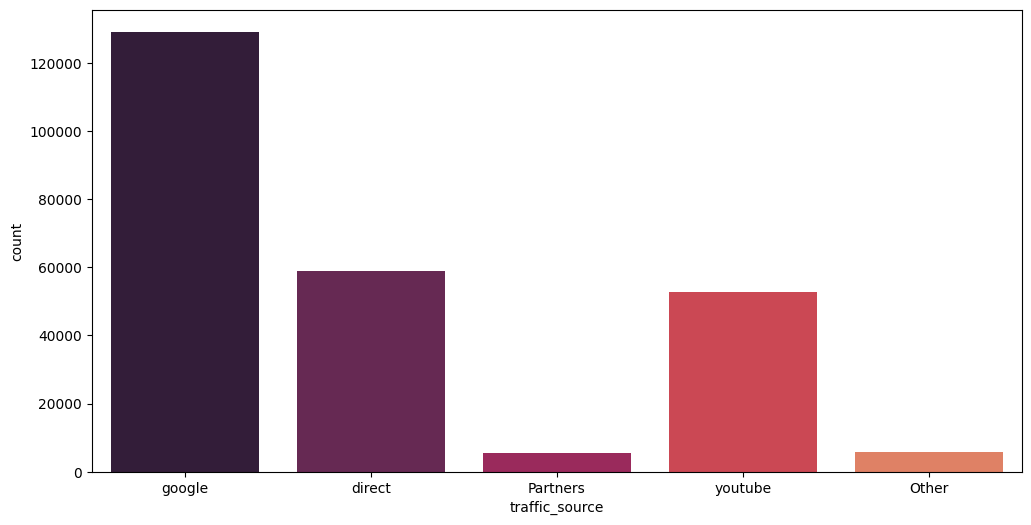

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(data = train, x = "traffic_source", hue = "traffic_source", legend = False)
plt.show()

In [ ]:
# check traffic_medium
# organic(자연검색), affiliate(제휴), referral(추천), cpc(cost per click), cpm(cost per mile)
train['traffic_medium'].unique()

array(['organic', '(none)', 'affiliate', 'referral', 'cpc', 'cpm',
       '(not set)'], dtype=object)

In [ ]:
index = train.loc[(train["traffic_source"] == "Partners") & (train["traffic_medium"] == "(not set)")].index
train.loc[index, "traffic_medium"] = "affiliate"

index = train.loc[(train["traffic_source"] == "google") & (train["traffic_medium"] == "(not set)")].index
train.loc[index, "traffic_medium"] = train.loc[(train["traffic_source"] == "google")]["traffic_medium"].mode()[0]

In [ ]:
index = test.loc[(test["traffic_source"] == "Partners") & (test["traffic_medium"] == "(not set)")].index
test.loc[index, "traffic_medium"] = "affiliate"

index = test.loc[(test["traffic_source"] == "Other") & (test["traffic_medium"] == "(not set)")].index
test.loc[index, "traffic_medium"] = test.loc[(test["traffic_source"] == "Other")]["traffic_medium"].mode()[0]

In [ ]:
train["keyword"].unique()

array(['Category8', nan, 'Category9', 'Category1_Keyword_000',
       'Category1_Keyword_001', 'Category10', 'Category1_Keyword_002',
       'Category6_Keyword_003', 'Category2_Keyword_004',
       'Category2_Keyword_005', 'Category1_Keyword_006',
       'Category2_Keyword_007', 'Category11', 'Category2_Keyword_008',
       'Category2_Keyword_009', 'Category4_Keyword_010',
       'Category1_Keyword_011', 'Category6_Keyword_012',
       'Category3_Keyword_013', 'Category2_Keyword_014',
       'Category2_Keyword_015', 'Category3_Keyword_016',
       'Category1_Keyword_017', 'Category6_Keyword_018',
       'Category2_Keyword_019', 'Category1_Keyword_020',
       'Category2_Keyword_021', 'Category2_Keyword_022',
       'Category2_Keyword_023', 'Category2_Keyword_024',
       'Category1_Keyword_025', 'Category2_Keyword_026',
       'Category1_Keyword_027', 'Category4_Keyword_028',
       'Category2_Keyword_029', 'Category4_Keyword_030',
       'Category4_Keyword_031', 'Category2_Keyword_032

In [ ]:
success_index = train.loc[(train["keyword"].isna() == False) & (train["duration"] != 0)].index
fail_index = train.loc[(train["keyword"].isna() == False) & (train["duration"] == 0)].index
train.loc[success_index, "keyword"] = "success"
train.loc[fail_index, "keyword"] = "fail"
train["keyword"].fillna("None", inplace = True)

In [ ]:
train["keyword"].unique()

array(['success', 'None', 'fail'], dtype=object)

In [ ]:
test

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,traffic_source,traffic_medium,keyword,referral_path
0,Chrome,Other,desktop,1,75.0,698.0,0,0.0,0.0,Americas,direct,(none),NaN,Category1
1,Other,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,google,organic,Category8,NaN
2,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,youtube,referral,NaN,Category2_Path_0082
3,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,google,organic,Category8,NaN
4,Other,Other,mobile,1,2.0,372.0,0,0.0,0.0,Asia,youtube,referral,NaN,Category11_Path_0088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,Other,Windows,mobile,1,1.0,0.0,1,0.0,0.0,Americas,Other,referral,NaN,Category1
79782,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,google,organic,Category8,NaN
79783,Other,Macintosh,desktop,1,1.0,22.0,0,0.0,0.0,Oceania,google,organic,Category8,NaN
79784,Other,iOS,mobile,1,1.0,135.0,0,0.0,0.0,Americas,google,organic,Category8,NaN


In [ ]:
success_index = test.loc[(test["keyword"].isna() == False) & (test["duration"] != 0)].index
fail_index = test.loc[(test["keyword"].isna() == False) & (test["duration"] == 0)].index
test.loc[success_index, "keyword"] = "success"
test.loc[fail_index, "keyword"] = "fail"
test["keyword"].fillna("None", inplace = True)
test["keyword"].unique()

array(['None', 'fail', 'success'], dtype=object)

In [ ]:
# train["keyword"].fillna(0, inplace = True)
# index = train.loc[train["keyword"] != 0].index
# train.loc[index, "keyword"] = 1
# train["keyword"].unique()

In [ ]:
# test["keyword"].fillna(0, inplace = True)
# index = test.loc[test["keyword"] != 0].index
# test.loc[index, "keyword"] = 1
# test["keyword"].unique()

In [ ]:
success_index = train.loc[(train["referral_path"].isna() == False) & (train["duration"] != 0)].index
fail_index = train.loc[(train["referral_path"].isna() == False) & (train["duration"] == 0)].index

train.loc[success_index, "referral_path"] = "success"
train.loc[fail_index, "referral_path"] = "fail"
train["referral_path"].fillna("None", inplace = True)
train["referral_path"].unique()

array(['None', 'fail', 'success'], dtype=object)

In [ ]:
success_index = test.loc[(test["referral_path"].isna() == False) & (test["duration"] != 0)].index
fail_index = test.loc[(test["referral_path"].isna() == False) & (test["duration"] == 0)].index

test.loc[success_index, "referral_path"] = "success"
test.loc[fail_index, "referral_path"] = "fail"
test["referral_path"].fillna("None", inplace = True)
test["referral_path"].unique()

array(['success', 'None', 'fail'], dtype=object)

In [ ]:
# train["referral_path"].fillna(0, inplace = True)
# index = train.loc[train["referral_path"] != 0].index
# train.loc[index, "referral_path"] = 1
# train["referral_path"].unique()

In [ ]:
# test["referral_path"].fillna(0, inplace = True)
# index = test.loc[test["referral_path"] != 0].index
# test.loc[index, "referral_path"] = 1
# test["referral_path"].unique()

In [ ]:
# train = train.astype({"keyword": 'int', "referral_path": 'int'})
# test = test.astype({"keyword": 'int', "referral_path": 'int'})
# train.dtypes

In [ ]:
train.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


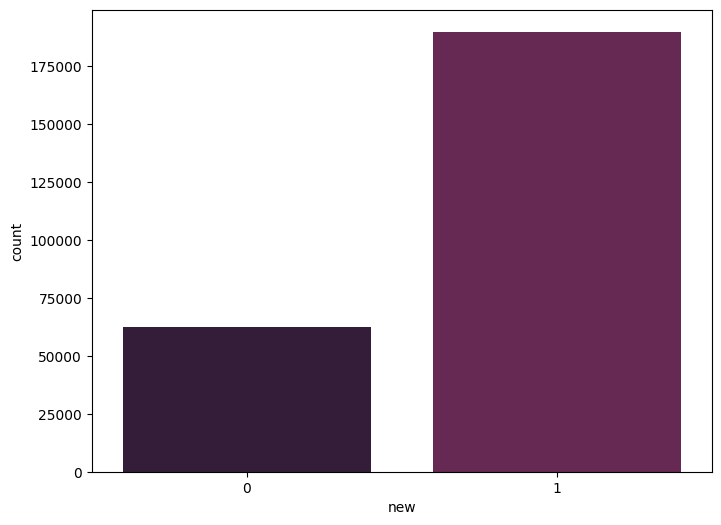

In [ ]:
# New Column check

plt.figure(figsize = (8, 6))
sns.countplot(x = train["new"], hue = train["new"], legend = False)
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = RobustScaler()
scale_columns = ["quality", "duration", "transaction", "transaction_revenue"]

train["quality"] = train["quality"].apply(lambda x: np.log1p(x))
train["duration"] = train["duration"].apply(lambda x: np.log1p(x))
train["transaction_revenue"] = train["transaction_revenue"].apply(lambda x: np.log1p(x))

# train["TARGET"] = train["TARGET"].apply(lambda x: np.log1p(x))

train["quality"] = scaler.fit_transform(train[scale_columns])

In [ ]:
test["quality"] = test["quality"].apply(lambda x: np.log1p(x))
test["duration"] = test["duration"].apply(lambda x: np.log1p(x))
test["transaction_revenue"] = test["transaction_revenue"].apply(lambda x: np.log1p(x))

test["quality"] = scaler.fit_transform(test[scale_columns])

In [ ]:
train

,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,traffic_source,traffic_medium,keyword,referral_path
0,17.0,Chrome,Macintosh,desktop,0,3.135494,6.733402,0,0.0,0.0,Americas,google,organic,success,None
1,3.0,Chrome,Windows,desktop,1,0.000000,3.688879,0,0.0,0.0,Europe,google,organic,success,None
2,1.0,Other,Android,mobile,1,0.000000,0.000000,1,0.0,0.0,Asia,direct,(none),None,None
3,1.0,Chrome,Macintosh,desktop,1,0.000000,0.000000,1,0.0,0.0,Americas,Partners,affiliate,None,None
4,1.0,Chrome,iOS,mobile,0,0.000000,0.000000,1,0.0,0.0,Americas,google,referral,None,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252284,1.0,Chrome,Android,mobile,1,0.000000,0.000000,1,0.0,0.0,Europe,youtube,referral,None,fail
252285,1.0,Chrome,Macintosh,desktop,0,0.000000,0.000000,1,0.0,0.0,Americas,google,organic,fail,None
252286,5.0,Chrome,Macintosh,desktop,0,0.405465,4.248495,0,0.0,0.0,Americas,direct,(none),None,success
252287,1.0,Other,Android,mobile,1,0.000000,3.367296,0,0.0,0.0,Africa,youtube,referral,None,success


In [ ]:
test

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,traffic_source,traffic_medium,keyword,referral_path
0,Chrome,Other,desktop,1,5624.0,487204.0,0,0.0,0.0,Americas,direct,(none),None,success
1,Other,iOS,mobile,0,0.0,0.0,1,0.0,0.0,Americas,google,organic,fail,None
2,Chrome,Windows,desktop,1,0.0,1089.0,0,0.0,0.0,Asia,youtube,referral,None,success
3,Chrome,Android,mobile,1,0.0,5776.0,0,0.0,0.0,Americas,google,organic,success,None
4,Other,Other,mobile,1,3.0,138384.0,0,0.0,0.0,Asia,youtube,referral,None,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,Other,Windows,mobile,1,0.0,0.0,1,0.0,0.0,Americas,Other,referral,None,fail
79782,Chrome,Macintosh,desktop,1,0.0,0.0,1,0.0,0.0,Americas,google,organic,fail,None
79783,Other,Macintosh,desktop,1,0.0,484.0,0,0.0,0.0,Oceania,google,organic,success,None
79784,Other,iOS,mobile,1,0.0,18225.0,0,0.0,0.0,Americas,google,organic,success,None


# Categorical Column One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
columns = train[["browser", "OS", "device", "continent", "traffic_source", "traffic_medium", "keyword", "referral_path"]]
combined_columns = pd.concat([columns], axis=1)

encoded_data = encoder.fit_transform(combined_columns).toarray()

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["browser", "OS", "device", "continent", "traffic_source", "traffic_medium", "keyword", "referral_path"]))

encoded_train = pd.concat([train, df_encoded], axis=1)
encoded_train.drop(["browser", "OS", "device", "continent", "traffic_source", "traffic_medium", "keyword", "referral_path"], axis = 1, inplace = True)
encoded_train

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue,browser_Chrome,browser_Other,OS_Android,...,traffic_medium_cpc,traffic_medium_cpm,traffic_medium_organic,traffic_medium_referral,keyword_None,keyword_fail,keyword_success,referral_path_None,referral_path_fail,referral_path_success
0,17.0,0,3.135494,6.733402,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3.0,1,0.000000,3.688879,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1,0.000000,0.000000,1,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1,0.000000,0.000000,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0,0.000000,0.000000,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252284,1.0,1,0.000000,0.000000,1,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
252285,1.0,0,0.000000,0.000000,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
252286,5.0,0,0.405465,4.248495,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
252287,1.0,1,0.000000,3.367296,0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,traffic_source,traffic_medium,keyword,referral_path
0,Chrome,Other,desktop,1,5624.0,487204.0,0,0.0,0.0,Americas,direct,(none),None,success
1,Other,iOS,mobile,0,0.0,0.0,1,0.0,0.0,Americas,google,organic,fail,None
2,Chrome,Windows,desktop,1,0.0,1089.0,0,0.0,0.0,Asia,youtube,referral,None,success
3,Chrome,Android,mobile,1,0.0,5776.0,0,0.0,0.0,Americas,google,organic,success,None
4,Other,Other,mobile,1,3.0,138384.0,0,0.0,0.0,Asia,youtube,referral,None,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,Other,Windows,mobile,1,0.0,0.0,1,0.0,0.0,Americas,Other,referral,None,fail
79782,Chrome,Macintosh,desktop,1,0.0,0.0,1,0.0,0.0,Americas,google,organic,fail,None
79783,Other,Macintosh,desktop,1,0.0,484.0,0,0.0,0.0,Oceania,google,organic,success,None
79784,Other,iOS,mobile,1,0.0,18225.0,0,0.0,0.0,Americas,google,organic,success,None


In [ ]:
columns = test[["browser", "OS", "device", "continent", "traffic_source", "traffic_medium", "keyword", "referral_path"]]
combined_columns = pd.concat([columns], axis=1)

encoded_data = encoder.fit_transform(combined_columns).toarray()

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["browser", "OS", "device", "continent", "traffic_source", "traffic_medium", "keyword", "referral_path"]))
encoded_test = pd.concat([test, df_encoded], axis=1)
encoded_test.drop(["browser", "OS", "device", "continent", "traffic_source", "traffic_medium", "keyword", "referral_path"], axis = 1, inplace = True)
encoded_test

,new,quality,duration,bounced,transaction,transaction_revenue,browser_Chrome,browser_Other,OS_Android,OS_Macintosh,...,traffic_medium_cpc,traffic_medium_cpm,traffic_medium_organic,traffic_medium_referral,keyword_None,keyword_fail,keyword_success,referral_path_None,referral_path_fail,referral_path_success
0,1,5624.0,487204.0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0.0,1089.0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,5776.0,0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,3.0,138384.0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,1,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
79782,1,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
79783,1,0.0,484.0,0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
79784,1,0.0,18225.0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.2 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

X = encoded_train.drop(["TARGET"], axis = 1)
y = encoded_train["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape

((201831, 37), (201831,))

In [ ]:
from sklearn.model_selection import GridSearchCV

cat_param = {"learning_rate": [0.03, 0.05, 0.07],
             "max_depth": [6, 8, 10],
             "n_estimators": [500, 700, 1000]}
# xgb_param = {"learning_rate": [0.03, 0.05, 0.07],
#              "max_depth": [6, 8, 10],
#              "n_estimators": [500, 700, 1000],
#              "gamma": [1, 2, 3]}

In [ ]:
# xgb_model = XGBRegressor(enable_categorical = True, verbosity = 1, booster = "gbtree", early_stopping_rounds=10, eval_metric='rmse', random_state = 42)
# grid_xgb = GridSearchCV(xgb_model, xgb_param, scoring = 'neg_root_mean_squared_error')
# grid_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

In [ ]:
# {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 300} grid_xgb, best_params_
# {'gamma': 2, 'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 500} score: 2.5838579026020896
# {'gamma': 3, 'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 500} score: 2.6071197795698
# print(grid_xgb.best_params_)
# print(grid_xgb.best_score_)
# print(grid_xgb.best_estimator_)

In [ ]:
# from xgboost import plot_importance

# xgb_best_model = grid_xgb.best_estimator_

# plot_importance(xgb_best_model)
# plt.show()

In [ ]:
# xgb_pred = grid_xgb.predict(X_test)
# root_mean_squared_error(y_test, xgb_pred)

In [ ]:
cat_model = CatBoostRegressor(learning_rate = 0.03,
                              max_depth = 8,
                              n_estimators = 500,
                              feature_weights = {"duration":3,"quality":1.3},
                              early_stopping_rounds= 10,
                              random_seed = 42)
# grid_cat = GridSearchCV(cat_model, cat_param, scoring = 'neg_root_mean_squared_error')

cat_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

0:	learn: 5.4370373	test: 5.2768747	best: 5.2768747 (0)	total: 205ms	remaining: 1m 42s
1:	learn: 5.3382230	test: 5.1744015	best: 5.1744015 (1)	total: 332ms	remaining: 1m 22s
2:	learn: 5.2454673	test: 5.0788850	best: 5.0788850 (2)	total: 434ms	remaining: 1m 11s
3:	learn: 5.1503661	test: 4.9806239	best: 4.9806239 (3)	total: 517ms	remaining: 1m 4s
4:	learn: 5.0634127	test: 4.8905801	best: 4.8905801 (4)	total: 593ms	remaining: 58.7s
5:	learn: 4.9788958	test: 4.8035565	best: 4.8035565 (5)	total: 676ms	remaining: 55.7s
6:	learn: 4.8948358	test: 4.7170131	best: 4.7170131 (6)	total: 787ms	remaining: 55.4s
7:	learn: 4.8139563	test: 4.6333027	best: 4.6333027 (7)	total: 898ms	remaining: 55.2s
8:	learn: 4.7385701	test: 4.5552305	best: 4.5552305 (8)	total: 1.02s	remaining: 55.5s
9:	learn: 4.6670896	test: 4.4812951	best: 4.4812951 (9)	total: 1.1s	remaining: 54.2s
10:	learn: 4.5972721	test: 4.4091077	best: 4.4091077 (10)	total: 1.19s	remaining: 52.7s
11:	learn: 4.5300104	test: 4.3396189	best: 4.33961

In [ ]:
 # grid_cat best_params_: {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 300}
 # {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500} score: 2.5836919912445304
 # {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 500} score: 2.5643834151748375
# print(grid_cat.best_params_)
# print(grid_cat.best_score_)

In [ ]:
cat_pred = cat_model.predict(X_test)
root_mean_squared_error(y_test, cat_pred)

2.5930635877977006

In [ ]:
result_db = pd.read_csv("/content/drive/MyDrive/Commit/ML_project/WebLog/data/sample_submission.csv")
result_db

,sessionID,TARGET
0,SESSION_252289,0
1,SESSION_252290,0
2,SESSION_252291,0
3,SESSION_252292,0
4,SESSION_252293,0
...,...,...
79781,SESSION_332070,0
79782,SESSION_332071,0
79783,SESSION_332072,0
79784,SESSION_332073,0


In [ ]:
test

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,traffic_source,traffic_medium,keyword,referral_path
0,Chrome,Other,desktop,1,5624.0,487204.0,0,0.0,0.0,Americas,direct,(none),None,success
1,Other,iOS,mobile,0,0.0,0.0,1,0.0,0.0,Americas,google,organic,fail,None
2,Chrome,Windows,desktop,1,0.0,1089.0,0,0.0,0.0,Asia,youtube,referral,None,success
3,Chrome,Android,mobile,1,0.0,5776.0,0,0.0,0.0,Americas,google,organic,success,None
4,Other,Other,mobile,1,3.0,138384.0,0,0.0,0.0,Asia,youtube,referral,None,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,Other,Windows,mobile,1,0.0,0.0,1,0.0,0.0,Americas,Other,referral,None,fail
79782,Chrome,Macintosh,desktop,1,0.0,0.0,1,0.0,0.0,Americas,google,organic,fail,None
79783,Other,Macintosh,desktop,1,0.0,484.0,0,0.0,0.0,Oceania,google,organic,success,None
79784,Other,iOS,mobile,1,0.0,18225.0,0,0.0,0.0,Americas,google,organic,success,None


In [ ]:
result = cat_model.predict(encoded_test)
result = [0 if i < 0 else i for i in result]

result_db["TARGET"] = result
result_db

NameError: name 'categorical_features' is not defined

In [ ]:
result_db.to_csv("/content/drive/MyDrive/데이콘/WebLog Analytic/submission_cat3.csv", index = False)

In [ ]:
data = check_db.corr(numeric_only = True)
plt.figure(figsize = (8, 8))
sns.heatmap(data = data, annot = True, fmt = ".3f")
plt.show()